In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.linear_model import TheilSenRegressor, RANSACRegressor, HuberRegressor

df = pd.read_csv('modelingdf.csv')
df = df.drop('Unnamed: 0', axis =1)

In [2]:
df.head()

,A,FC,G,GP,GS,MINS,OFF,R,SHTS,SOG,Y,season,club,position,next_year_compensation,name,current_compensation
0,0.0,7.0,0.0,8.0,5.0,460.0,3.0,0.0,8.0,3.0,0.0,2007,CLB,M,12900,brian plotkin,30000
1,4.0,28.0,3.0,30.0,11.0,1241.0,4.0,0.0,38.0,16.0,5.0,2007,CHI,F,63100,calen carr,50500
2,2.0,21.0,8.0,33.0,28.0,2181.0,37.0,0.0,65.0,41.0,3.0,2007,TFC,F,61273,chad barrett,48713
3,3.0,15.0,8.0,22.0,21.0,1721.0,5.0,0.0,44.0,22.0,1.0,2007,CHI,F,86075,chris rolfe,74700
4,0.0,43.0,1.0,26.0,24.0,2044.0,2.0,0.0,11.0,3.0,4.0,2007,CHI,D,44625,dasan robinson,42500


In [3]:
df = df.drop('name', axis=1)

In [4]:
df = pd.get_dummies(df)

In [5]:
df.shape

(2360, 53)

In [6]:
def quick_plots(column):
    norm = np.random.normal(0, 1, len(df))
    norm.sort()
    earnings_sorted = column.sort_values()
    plt.figure(figsize = (20,5))
    plt.subplot(1,2,1)
    plt.plot(norm, column.sort_values(), "o")
    plt.title('QQ Plot')
    
    plt.subplot(1,2,2)
    plt.scatter(x=column, y=df['next_year_compensation'])
    plt.title('Scatter Plot')
    plt.ylabel('Next Year Compensation')
    plt.xlabel('Column Name')
    plt.show()

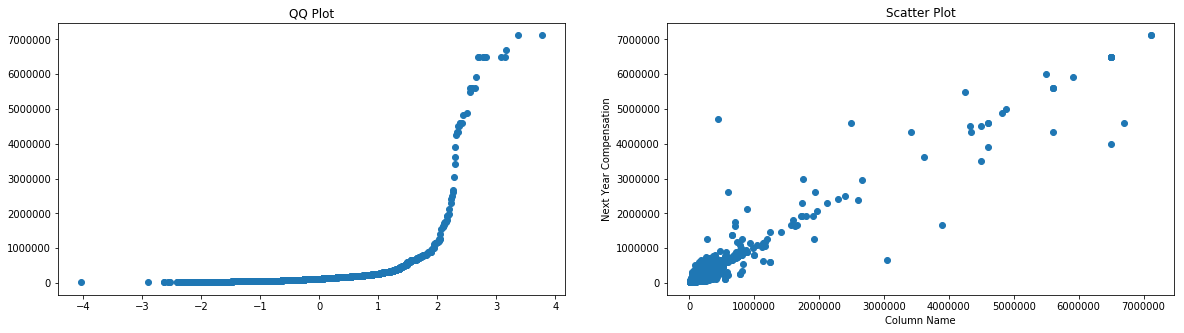

In [7]:
quick_plots(df.current_compensation)

In [8]:
df = df[df['current_compensation'] <5000000]

In [9]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state = 12)
X_train = df_train.loc[:, ~(df_train.columns).isin(['next_year_compensation'])]
Y_train = df_train['next_year_compensation']
X_test = df_test.loc[:, ~(df_test.columns).isin(['next_year_compensation'])]
Y_test = df_test['next_year_compensation']

In [10]:
linear = LinearRegression()
ridge = Ridge()
gbr = GradientBoostingRegressor()
rfr = RandomForestRegressor()
theilsan = TheilSenRegressor()
ransac = RANSACRegressor()
huber = HuberRegressor()

In [11]:
df.next_year_compensation.describe()

count    2.344000e+03
mean     2.252376e+05
std      4.205487e+05
min      1.290000e+04
25%      7.775000e+04
50%      1.326030e+05
75%      2.141248e+05
max      5.500000e+06
Name: next_year_compensation, dtype: float64

In [12]:
def get_metrics(model, dataframe):
    x = dataframe.loc[:, ~(df_train.columns).isin(['next_year_compensation'])]
    y = dataframe['next_year_compensation']
    r2_scores = cross_val_score(model, x, y, cv=10)
    r2 = r2_scores.mean()
    mse_scores = cross_val_score(model,x,y, cv=10, scoring='neg_mean_squared_error')
    mse = mse_scores.mean() * -1
    rmse = np.sqrt(mse)
    print(model)
    print('R2 Score:', r2)
    print('MSE:', mse)
    print('RMSE:', rmse)

In [13]:
get_metrics(linear, df_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
R2 Score: 0.855988914385
MSE: 20776552351.4
RMSE: 144140.738001


In [14]:
get_metrics(ridge,df_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
R2 Score: 0.856110410715
MSE: 20756235028.2
RMSE: 144070.243382


In [15]:
get_metrics(gbr, df_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)
R2 Score: 0.817461659263
MSE: 26446908491.2
RMSE: 162625.054931


In [16]:
get_metrics(rfr, df_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
R2 Score: 0.851978431595
MSE: 25960994226.0
RMSE: 161124.157798


In [17]:
get_metrics(theilsan, df_train)

TheilSenRegressor(copy_X=True, fit_intercept=True, max_iter=300,
         max_subpopulation=10000, n_jobs=1, n_subsamples=None,
         random_state=None, tol=0.001, verbose=False)
R2 Score: 0.786091225206
MSE: 30236099900.3
RMSE: 173885.306741


In [18]:
get_metrics(ransac, df_train)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        loss='absolute_loss', max_skips=inf, max_trials=100,
        min_samples=None, random_state=None, residual_metric=None,
        residual_threshold=None, stop_n_inliers=inf, stop_probability=0.99,
        stop_score=inf)
R2 Score: 0.855165575733
MSE: 21947181125.0
RMSE: 148145.810353


In [19]:
get_metrics(huber, df_train)

HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
        tol=1e-05, warm_start=False)
R2 Score: 0.855486599753
MSE: 21490186280.9
RMSE: 146595.314662


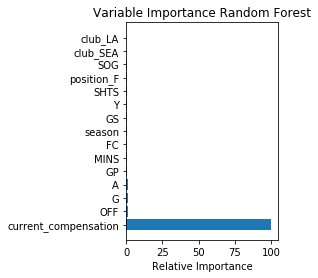

In [20]:
rfr.fit(X_train, Y_train)

feature_importance = rfr.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[::-1]
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos[0:15], feature_importance[sorted_idx[0:15]], align='center')
plt.yticks(pos[0:15], X_train.columns[sorted_idx[0:15]])
plt.xlabel('Relative Importance')
plt.title('Variable Importance Random Forest')
plt.show()

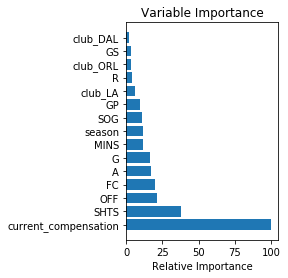

In [21]:
gbr.fit(X_train,Y_train)

feature_importance = gbr.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[::-1]
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos[0:15], feature_importance[sorted_idx[0:15]], align='center')
plt.yticks(pos[0:15], X_train.columns[sorted_idx[0:15]])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [22]:
huber.fit(X_train,Y_train)
print(huber.coef_)

[  1.48642952e-02   8.65798517e-02   1.89980251e-02   6.72955680e-02
   7.34352408e-02   6.45270739e+00   2.26423257e-02   7.90351463e-04
   1.41540328e-01   5.50599920e-02   9.17908866e-03   1.16838049e+00
   1.00710497e+00  -3.71260712e-05  -2.67796644e-06  -1.29526528e-04
  -5.56318018e-05  -2.65578839e-04   1.68531926e-04   1.57748336e-04
  -2.83158817e-04   4.32222885e-04  -7.70338652e-05  -6.36271296e-05
   1.96692664e-05   1.79711368e-05  -1.94791297e-05  -1.32365444e-04
   1.36604938e-04   9.27714106e-05   6.91622229e-05   1.39258438e-04
   6.47088580e-05  -5.47380621e-05   3.39718317e-04  -1.97775172e-04
   2.14822370e-04  -9.73794657e-06  -1.41442390e-04   1.91394242e-04
  -1.97943959e-04  -7.92572150e-07   5.57098212e-05   0.00000000e+00
   3.27258882e-04   1.38356412e-04   1.72907464e-05   5.11111250e-05
   2.18859611e-05   1.61800315e-04  -1.85641641e-05   1.85726182e-05]
